<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/01_Supervised-%20Machine%20Learning/03_KNN/Iris_flower%20_type%20Classification%20prediction/iris_flower_type_classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

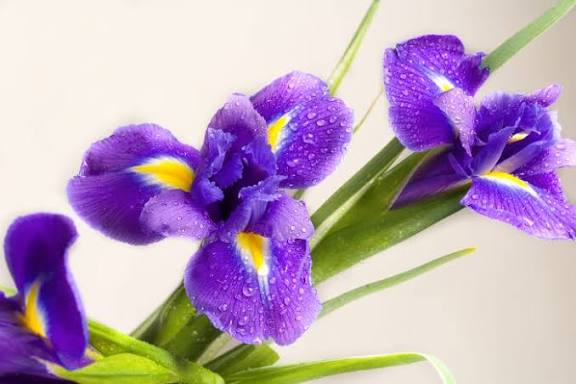
#**Project Title: Iris Flower Classification using K-Nearest Neighbors (KNN)**

**Project Description:**
This project applies the K-Nearest Neighbors (KNN) algorithm to classify iris flowers into three species — Setosa, Versicolor, and Virginica — based on their sepal and petal measurements. The dataset used is the popular Iris dataset, a well-known benchmark in machine learning for testing classification algorithms.

**Loading Dataset from Sklearn**

In [8]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

**Preprocessed and explored the dataset to understand feature relationships.**

In [9]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df['target_names'] = df.target.map({i: name for i, name in enumerate(iris.target_names)})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


**Grouping Flowers into different types**

In [10]:
df_setosa = df[df['target']==0]
df_versicolor = df[df['target']==1]
df_verginca = df[df['target']==2]

**Visualising flowers to see boundaries**

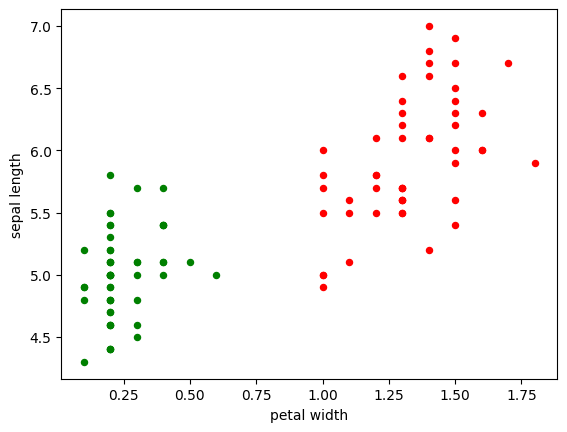

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df_setosa['petal width (cm)'], df_setosa['sepal length (cm)'], c="g", s=19)
plt.scatter(df_versicolor['petal width (cm)'], df_versicolor['sepal length (cm)'], c="r", s=19)
plt.xlabel("petal width")
plt.ylabel("sepal length")
plt.show()

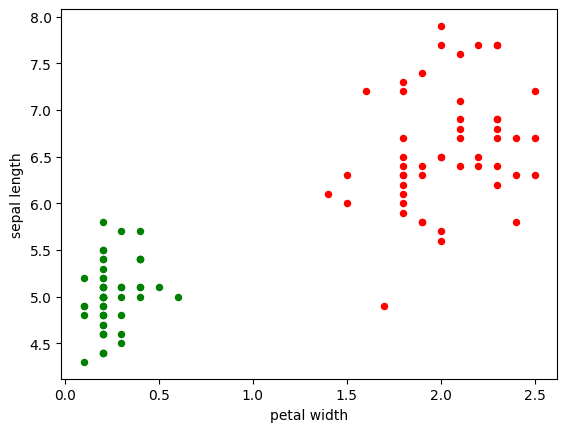

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(df_setosa['petal width (cm)'], df_setosa['sepal length (cm)'], c="g", s=19)
plt.scatter(df_verginca['petal width (cm)'], df_verginca['sepal length (cm)'], c="r", s=19)
plt.xlabel("petal width")
plt.ylabel("sepal length")
plt.show()

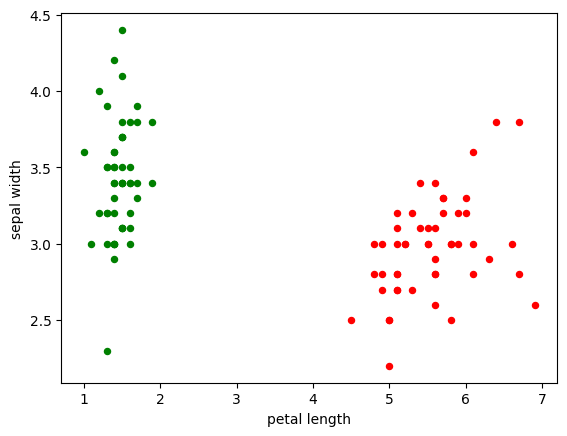

In [13]:
plt.scatter(df_setosa['petal length (cm)'], df_setosa['sepal width (cm)'], c="g", s=19)
plt.scatter(df_verginca['petal length (cm)'], df_verginca['sepal width (cm)'], c="r", s=19)
plt.xlabel("petal length")
plt.ylabel("sepal width")
plt.show()

**Seperating input features from target variable**

In [14]:
x = df.drop(columns=["target","target_names"])
y = df["target"]

**Split the data into training and testing sets.**

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Trained a KNN classifier to learn the pattern of flower species.**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(3).fit(x_train, y_train)

**Training and testing score**

In [17]:
print(f"x_train_score: {KNN.score(x_train, y_train)}")
print(f"x_test_score: {KNN.score(x_test, y_test)}")

x_train_score: 0.95
x_test_score: 1.0


**Result:
The model achieved an accuracy of 1.0 (100%), indicating perfect classification on the test data.**

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = KNN.predict(x_test)

CR = classification_report(y_test, y_pred)
print(CR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Visualizing the model performance using confusion matrix.**

Text(0.5, 1.0, 'Confusion Matrix')

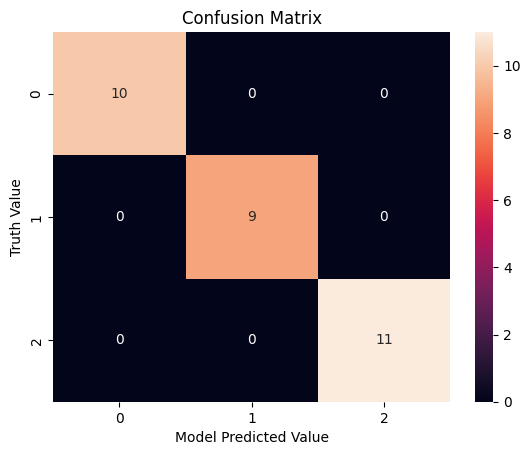

In [19]:
import seaborn as sns
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, annot=True)
plt.xlabel("Model Predicted Value")
plt.ylabel("Truth Value")
plt.title("Confusion Matrix")

#####**Exporting model**

In [21]:
import joblib
from google.colab import drive
drive.mount("/content/drive")

joblib.dump(KNN, "/content/drive/My Drive/Models/Iris Flower data/iris_flower_v1.0.0.joblib")

Mounted at /content/drive


['/content/drive/My Drive/Models/Iris Flower data/iris_flower_v1.0.0.joblib']

**Conclusion:**
When deployed, this model can accurately identify the species of any iris flower given its sepal and petal dimensions. It demonstrates how KNN can effectively handle simple multi-class classification tasks with clean, well-structured data — making it a great foundation for understanding supervised learning concepts.
